In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filepath = r'D:\Project\jupyter\machinelearning\chapter9clustering\watermelon4_0.csv'

In [3]:
df = pd.read_csv(filepath)
dataMat = np.mat(df[['density', 'ratio_suger']].values)

In [4]:
def func_p(x, u, sigma):
    _, n = x.shape
    return (1/(pow(2 * np.pi, n/2) * pow(np.linalg.det(sigma), 1/2))) * np.exp((-1/2) * (x-u) * sigma.I * (x-u).T)

In [5]:
"""
Gaussian Mixture Model 
EM 算法进行求局部最优解
input：
    dataMat:数据集矩阵
    k :Gaussian 混合成分个数
output:
    簇划分 C ={C1, C2, ..., Ck}
"""
def GMM_EM(dataMat, k, maxIter):
    r, c = dataMat.shape
    alpha = [1/3, 1/3 ,1/3]
    u = [dataMat[5], dataMat[21], dataMat[26]]
    sigma = [np.mat([[0.1, 0.0],[0.0, 0.1]])] * 3
    iter = 0
    while(iter <= maxIter):
        gamma = []
        for j in range(r):
            gamma.append([])
            p_sigmak = 0
            for l in range(k):
                p_sigmak += alpha[l] * func_p(dataMat[j], u[l], sigma[l])
            for i in range(k):
                gamma_ji = (alpha[i] * func_p(dataMat[j], u[i], sigma[i])) / p_sigmak
                gamma[j].append(np.asarray(gamma_ji)[0][0])
    #                 print(np.asarray(gamma_ji)[0][0])
    #     print(gamma)
        gammaMat = np.mat(gamma)
    #     print(gammaMat)
        for i in range(k):
    #         print(gammaMat.T)
    #         print(gammaMat.T[i].shape, dataMat.shape)
            u[i] = (gammaMat.T[i] * dataMat) / np.sum(gammaMat.T[i], 1)
            sigma[i] = (np.multiply(gammaMat.T[i], (dataMat - u[i]).T) * (dataMat - u[i]))/np.sum(gammaMat.T[i], 1)
            alpha[i] = np.sum(gammaMat.T[i], 1) / r
        iter += 1
#     print(gamma)
    C = {}
    for i in range(k):
        C[i] = []
    for j in range(r):
        cj = gamma[j].index(max(gamma[j]))
        C[cj].append(j)

    return C, u

In [6]:
C, u = GMM_EM(dataMat, 3, 10)

绘制图像

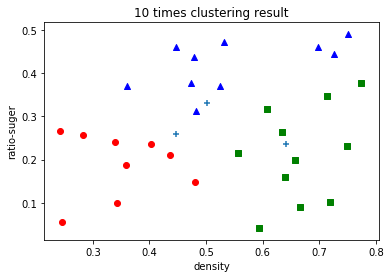

In [7]:
xcord = []
ycord = []
for i in range(len(C)):
    data = np.asarray(dataMat[C[i]])
    #print(data)
    xcord.append([])
    ycord.append([])
    for line in data:
#         print(line)
        xcord[i].append(line[0])
        ycord[i].append(line[1])
# print(xcord, ycord)
x_vec = []
y_vec = []
for data in u:
#     print(data)
    x_vec.append(np.asarray(data)[0][0])
    y_vec.append(np.asarray(data)[0][1])
plt.figure() 
plt.title('10 times clustering result')
plt.scatter(x_vec, y_vec, marker = '+')
plt.scatter(xcord[0], ycord[0], marker = 'o', c = 'red')
plt.scatter(xcord[1], ycord[1], marker = 's', c = 'green')
plt.scatter(xcord[2], ycord[2], marker = '^', c = 'blue')
plt.xlabel('density')
plt.ylabel('ratio-suger')
plt.show()

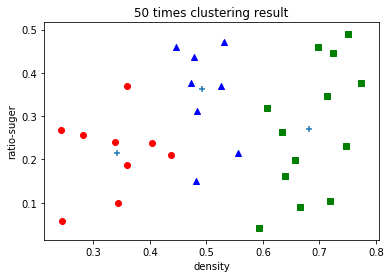

In [8]:
C, u = GMM_EM(dataMat, 3, 50)
xcord = []
ycord = []
for i in range(len(C)):
    data = np.asarray(dataMat[C[i]])
    #print(data)
    xcord.append([])
    ycord.append([])
    for line in data:
#         print(line)
        xcord[i].append(line[0])
        ycord[i].append(line[1])
# print(xcord, ycord)
x_vec = []
y_vec = []
for data in u:
#     print(data)
    x_vec.append(np.asarray(data)[0][0])
    y_vec.append(np.asarray(data)[0][1])
plt.figure() 
plt.title('50 times clustering result')
plt.scatter(x_vec, y_vec, marker = '+')
plt.scatter(xcord[0], ycord[0], marker = 'o', c = 'red')
plt.scatter(xcord[1], ycord[1], marker = 's', c = 'green')
plt.scatter(xcord[2], ycord[2], marker = '^', c = 'blue')
plt.xlabel('density')
plt.ylabel('ratio-suger')
plt.show()